## 호텔 예약 수요
### 포르투갈 호텔 예약 수요 데이터세트
  - 도심 호텔 및 리조트 호텔의 예약 정보
    - 예약 시기, 숙박 기간, 성인, 어린이 및 유아 수, 주차 가능 공간 수 등

In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [423]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/jessemostipak/hotel-booking-demand/hotel_bookings.csv')

In [424]:
df['hotel'].unique()
df['customer_type'].unique()
df.groupby('required_car_parking_spaces').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
required_car_parking_spaces,,,,,,,,,,,,,,,,,,,,,
0,111974,111974,111974,111974,111974,111974,111974,111974,111974,111974,...,111974,111974,97592,6037,111974,111974,111974,111974,111974,111974
1,7383,7383,7383,7383,7383,7383,7383,7383,7383,7383,...,7383,7383,5435,756,7383,7383,7383,7383,7383,7383
2,28,28,28,28,28,28,28,28,28,28,...,28,28,20,4,28,28,28,28,28,28
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,0,3,3,3,3,3,3
8,2,2,2,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2


In [425]:
print(df.shape)
print(df['is_canceled'].value_counts())
print(df.columns)
df.head()

(119390, 32)
is_canceled
0    75166
1    44224
Name: count, dtype: int64
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [426]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [427]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## null 값 추출하여 drop

In [428]:
nan_replacements = {'children': 0.0, 'country':'Unknown', 'agent':0, 'company':0}
df_cln = df.fillna(nan_replacements)
#df_cln['meal'] = df_cln['meal'].replace('Undefined', "SC", inplace=True)
df_cln.replace({'meal': {'Undefined', 'SC'}}, inplace=True)

zero_guests = list(df_cln.loc[df_cln['adults']
                              + df_cln['children']
                              + df_cln['babies'] ==0].index)
df_cln.drop(df_cln.index[zero_guests], inplace=True)

In [429]:
df_cln.shape

(119210, 32)

In [430]:
df.shape

(119390, 32)

In [431]:
rh = df_cln.loc[(df_cln['hotel'] == 'Resort Hotel') & (df_cln['is_canceled'] ==0)]
ch = df_cln.loc[(df_cln['hotel'] == 'City Hotel') & (df_cln['is_canceled'] ==0)]

In [432]:
df_cln['country'].value_counts()

country
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 178, dtype: int64

## 국가별 실제 손님 수

In [433]:
country_data = pd.DataFrame(df_cln.loc[df_cln["is_canceled"] == 0]["country"].value_counts())
country_data.reset_index(level=0, inplace=True)
country_data[country_data["country"] =='KOR']

,country,count
37,KOR,78


In [434]:
country_data.rename(columns={"country": "Name of Guests"}, inplace=True)
country_data.dtypes

Name of Guests    object
count              int64
dtype: object

In [435]:
total_guests = country_data["count"].sum()
country_data["Guests in %"] = round(country_data["count"] / total_guests * 100, 2)
country_data.loc[country_data["Guests in %"] < 2, 'Name of Guests'] = 'Other'

fig = px.pie(country_data, values="count",
             names='Name of Guests',
             title='Home country of guests',
             template='seaborn'
             )
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [436]:
country_data

,Name of Guests,count,Guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,Other,1,0.00
162,Other,1,0.00
163,Other,1,0.00
164,Other,1,0.00


In [437]:
guest_map = px.choropleth(country_data, locations=country_data['Name of Guests'], 
                          color=country_data['count'], hover_name=country_data['Name of Guests'],
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title='Home country of guests')
guest_map.show()

## 1박 가격의 연평균

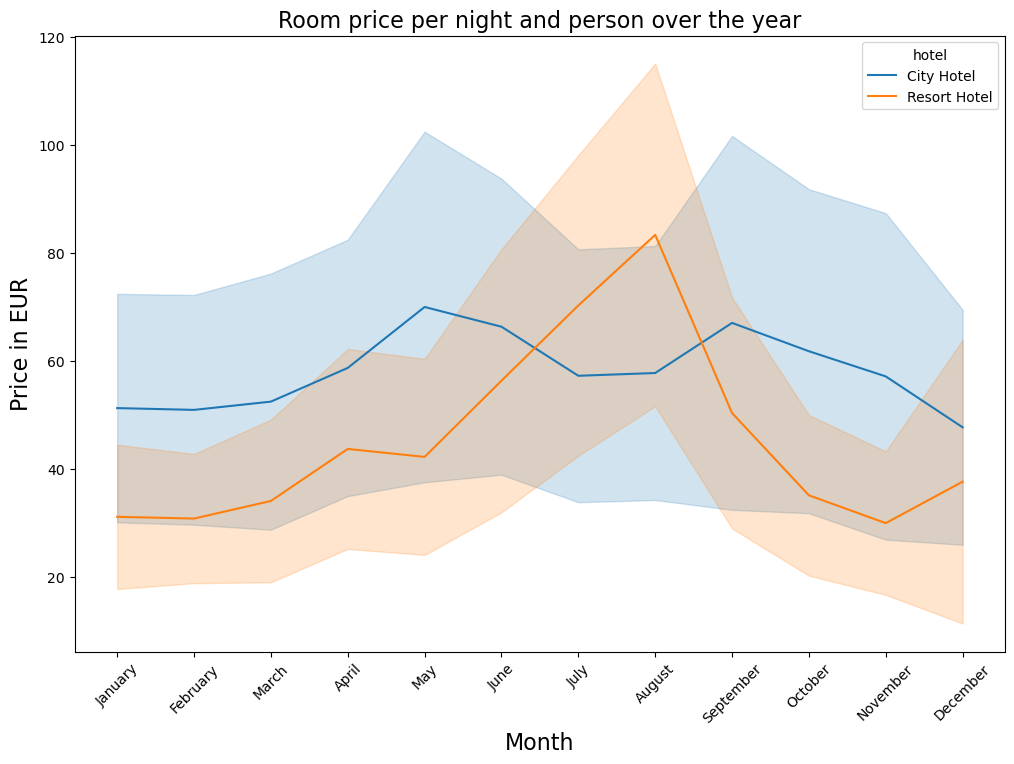

In [438]:
df_cln['adr_pp'] = df_cln['adr'] / (df_cln['adults'] + df_cln['children'])
df_guests = df_cln.loc[df_cln['is_canceled'] == 0]
room_prices_monthly = df_guests[['hotel', 'arrival_date_month', 'adr_pp']].sort_values('arrival_date_month')

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', "September", "October", 'November', 'December']
room_prices_monthly['arrival_date_month'] = pd.Categorical(room_prices_monthly['arrival_date_month'], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x='arrival_date_month', y='adr_pp', hue='hotel', data=room_prices_monthly, errorbar='sd') #sd: standard deviation(표준편차), ci: confidence interval(신뢰구간)
plt.title('Room price per night and person over the year', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price in EUR', fontsize=16)
plt.show()

## 국가별 평균 lead_time
### Bubble chart

In [439]:
country_data2 = pd.DataFrame(df_cln["country"].value_counts())
country_data2.reset_index(level=0, inplace=True)

lead_time_mean = df_cln.groupby('country')['lead_time'].mean()

#lead_time_sum = lead_time_sum[lead_time_sum != 0]
country_data2 = country_data2.sort_values(by='country')
country_data2['lead_time'] = np.round(lead_time_mean.values,0)
#print(lead_time_sum)
country_data2

,country,count,lead_time
135,ABW,2,126.0
25,AGO,362,23.0
151,AIA,1,0.0
91,ALB,12,103.0
105,AND,7,47.0
...,...,...,...
176,VGB,1,109.0
100,VNM,8,84.0
43,ZAF,80,70.0
139,ZMB,2,68.0


In [440]:
import plotly.express as px

filtered_data = country_data2[country_data2['count'] <=500]

fig = px.scatter(
    data_frame=filtered_data,
    x='country',
    y='lead_time',
    size='count',
    color='country',
    hover_name='country',
    size_max=50
)
fig.show()